### <h2 style="text-align: center;"> Questão (8) Programa (6)

In [1]:
import numpy as np
import cvxpy as cp
import control as ct
import matplotlib.pyplot as plt

# Sistema contínuo
A = np.array([[-2, 0],
              [0, -4]])
B = np.array([[1],
              [1]])
C = np.array([[0, 1]])
D = np.array([[0]])
sys_c = ct.ss(A, B, C, D)

# Sistema discreto
Ts = 0.1
sys_d = ct.c2d(sys_c, Ts)
A = sys_d.A
B = sys_d.B
C = sys_d.C
D = sys_d.D

# Dimensões
n = A.shape[0]
nu = B.shape[1]

# Variáveis do problema
P = cp.Variable((n,n), symmetric=True)
X = cp.Variable() # X = 1/Gamma**2
I = np.eye(nu)
eps = 1e-5

# Vetor de restrições
constraints = []

# LMI (Partição)
LMI11 = P - A.T@P@A - X*C.T@C
LMI12 = A.T@P@B + X*C.T@D
LMI21 = LMI12.T
LMI22 = I - B.T@P@B - X*D.T@D

# LMI (Montagem)
LMI = cp.bmat([[LMI11, LMI12],
               [LMI21, LMI22]])

# Adição das restrições
constraints.append(LMI >> np.eye(LMI.shape[0])*eps)
constraints.append(P >> np.eye(P.shape[0])*eps)

# Objetivo
obj = cp.Maximize(X)

# Problema
prob = cp.Problem(obj, constraints)

# Solução
prob.solve(verbose=False, solver='MOSEK')

# Resultado
if prob.status=='optimal':
    print("Factível.")
    print("P:")
    print(P.value)
    Gamma = 1/np.sqrt(X.value)
    print("Gamma:")
    print(Gamma)
else:
    print("Infactível.")

Factível.
P:
[[ 3.12361158 -6.24737067]
 [-6.24737067 61.02678357]]
Gamma:
0.25000164137087677


### <h2 style="text-align: center;"> Questão (8) Programa (7)

In [2]:
# Variáveis do problema
P = cp.Variable((n,n), symmetric=True)
X = cp.Variable() # X = Gamma**2
I = np.eye(nu)
eps = 1e-5

# Vetor de restrições
constraints = []

# LMI (Partição)
LMI11 = P - A.T@P@A
LMI12 = A.T@P@B
LMI13 = C.T
LMI21 = B.T@P@A
LMI22 = I - B.T@P@B
LMI23 = -D.T
LMI31 = C
LMI32 = -D
LMI33 = X*I

# LMI (Montagem)
LMI = cp.bmat([[LMI11, LMI12, LMI13],
               [LMI21, LMI22, LMI23],
               [LMI31, LMI32, LMI33]])

# Adição das restrições
constraints.append(LMI >> np.eye(LMI.shape[0])*eps)
constraints.append(P >> np.eye(P.shape[0])*eps)

# Objetivo
obj = cp.Minimize(X)

# Problema
prob = cp.Problem(obj, constraints)

# Solução
prob.solve(verbose=False, solver='MOSEK')

# Resultado
if prob.status=='optimal':
    print("Factível.")
    print("P:")
    print(P.value)
    Gamma = np.sqrt(X.value)
    print("Gamma:")
    print(Gamma)
else:
    print("Infactível.")

Factível.
P:
[[ 2.44650254 -4.89428296]
 [-4.89428296 58.32654574]]
Gamma:
0.2500216493067075


### <h2 style="text-align: center;"> Questão (9)

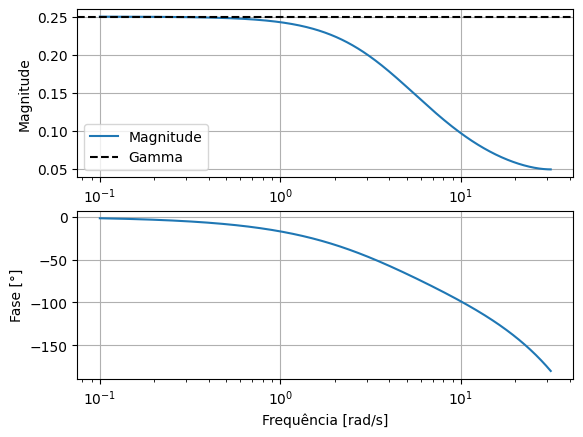

Máximo valor de magnitude: 0.24992294466816825


In [3]:
# Função de Trasferêcia do sistema discretizado
Gd = ct.ss2tf(sys_d)

# Bode
mag, phase, omega = ct.bode(Gd, plot=False)

# Subplot superior
plt.figure()
plt.subplot(2, 1, 1)
plt.semilogx(omega, mag, label="Magnitude")
plt.axhline(Gamma, color='black', linestyle='--', label='Gamma')
plt.ylabel("Magnitude")
plt.grid()
plt.legend()

# Subplot inferior
plt.subplot(2, 1, 2)
plt.semilogx(omega, phase*180/np.pi, label="Fase")
plt.xlabel("Frequência [rad/s]")
plt.ylabel("Fase [°]")
plt.grid()
plt.show()

# Máximo da magnitude
print("Máximo valor de magnitude:", np.max(mag))

### <h5> Conclusão: A norma H infinito corresponde ao máximo valor de amplitude do diagrama de bode.